# Background
Green cabs, introduced to extend taxi services to NYC's outer boroughs and upper Manhattan, play a crucial role in urban transportation. In 2023, CMT and VeriFone, the two primary vendors managing green cabs, faced significant challenges that impacted their operations and revenue. These challenges included competition from ride-sharing giants like Uber and Lyft, regulatory hurdles, rising fuel costs, and customer service issues.

CMT focused on enhancing fare payment systems by collaborating with VeriFone to integrate payment apps, aiming to simplify and secure the payment process for passengers and drivers alike. However, this partnership was marred by a legal dispute over advertising revenue sharing, leading to operational difficulties and impacting the overall efficiency and revenue of green taxis​​ (Mordor Research).


## Main Problem
How can green cabs improve their operational efficiency and competitive edge in the NYC taxi market?

# Data Dictionary

#### Feature Descriptions

#### VendorID
- **Description:** A code indicating the LPEP provider that provided the record.
- **Values:**
  - `1`: Creative Mobile Technologies, LLC.
  - `2`: VeriFone Inc.

#### lpep_pickup_datetime
- **Description:** The date and time when the meter was engaged.

#### lpep_dropoff_datetime
- **Description:** The date and time when the meter was disengaged.

#### Passenger_count
- **Description:** The number of passengers in the vehicle.
- **Details:** This is a driver-entered value.

#### Trip_distance
- **Description:** The elapsed trip distance in miles as reported by the taximeter.

#### PULocationID
- **Description:** TLC Taxi Zone in which the taximeter was engaged.

#### DOLocationID
- **Description:** TLC Taxi Zone in which the taximeter was disengaged.

#### RatecodeID
- **Description:** The final rate code in effect at the end of the trip.
- **Values:**
  - `1`: Standard rate
  - `2`: JFK
  - `3`: Newark
  - `4`: Nassau or Westchester
  - `5`: Negotiated fare
  - `6`: Group ride

#### Store_and_fwd_flag
- **Description:** Indicates whether the trip record was held in vehicle memory before sending to the vendor.
- **Values:**
  - `Y`: Store and forward trip
  - `N`: Not a store and forward trip

#### Payment_type
- **Description:** A numeric code signifying how the passenger paid for the trip.
- **Values:**
  - `1`: Credit card
  - `2`: Cash
  - `3`: No charge
  - `4`: Dispute
  - `5`: Unknown
  - `6`: Voided trip

#### Fare_amount
- **Description:** The time-and-distance fare calculated by the meter.

#### Extra
- **Description:** Miscellaneous extras and surcharges. Includes the $0.50 and $1 rush hour and overnight charges.

#### MTA_tax
- **Description:** $0.50 MTA tax automatically triggered based on the metered rate in use.

#### Improvement_surcharge
- **Description:** $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.

#### Tip_amount
- **Description:** Tips automatically populated for credit card tips. Cash tips are not included.

#### Tolls_amount
- **Description:** The total amount of all tolls paid in the trip.

#### Total_amount
- **Description:** The total amount charged to passengers. Does not include cash tips.

#### Trip_type
- **Description:** A code indicating whether the trip was a street hail or a dispatch.
- **Values:**
  - `1`: Street-hail
  - `2`: Dispatch

# DATA PREPARATION

### IMPORT LIBRARY

In [533]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

### LOAD DATASET

In [534]:
df = pd.read_csv('NYC TLC Trip Record.csv')

C:\Users\Asus\AppData\Local\Temp\ipykernel_34176\1402211860.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC TLC Trip Record.csv')


In [535]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [536]:
df.shape

(68211, 20)

### ADD DATASET

In [537]:
LocationID = pd.read_csv('taxi_zone_lookup.csv')

In [538]:
# Add location_lookup 
LocationID = LocationID[['LocationID', 'Borough', 'Zone','service_zone']]

### MERGE DATASET

In [539]:
# Merge the zone and borough information for PULocationID
df = df.merge(LocationID, how='left', left_on='PULocationID', right_on='LocationID')
df.rename(columns={'Borough': 'PU_Borough', 'Zone': 'PU_Zone', 'service_zone': 'PU_service_zone'}, inplace=True)
df.drop('LocationID', axis=1, inplace=True)

# Merge the zone and borough information for DOLocationID
df = df.merge(LocationID, how='left', left_on='DOLocationID', right_on='LocationID')
df.rename(columns={'Borough': 'DO_Borough', 'Zone': 'DO_Zone', 'service_zone': 'DO_service_zone'}, inplace=True)
df.drop('LocationID', axis=1, inplace=True)

In [540]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


In [621]:
# checking service zone
df[df['PU_service_zone'] == 'Yellow Zone']

KeyError: 'PU_service_zone'

In [542]:
# drop the invalid service zone 
df.drop(df[df['PU_service_zone'] == 'Yellow Zone'].index, inplace=True)

### Data Information

In [543]:
df.shape

(64253, 26)

In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64253 entries, 0 to 68210
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               64253 non-null  int64  
 1   lpep_pickup_datetime   64253 non-null  object 
 2   lpep_dropoff_datetime  64253 non-null  object 
 3   store_and_fwd_flag     59974 non-null  object 
 4   RatecodeID             59974 non-null  float64
 5   PULocationID           64253 non-null  int64  
 6   DOLocationID           64253 non-null  int64  
 7   passenger_count        59974 non-null  float64
 8   trip_distance          64253 non-null  float64
 9   fare_amount            64253 non-null  float64
 10  extra                  64253 non-null  float64
 11  mta_tax                64253 non-null  float64
 12  tip_amount             64253 non-null  float64
 13  tolls_amount           64253 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  improve

### Change Date Data Type

In [545]:
# change datetime columns to datetime format
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

### Change numeric data to absolute if there are negative values

In [546]:
# Convert all numerical columns to absolute values
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].abs()

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64253 entries, 0 to 68210
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64253 non-null  int64         
 1   lpep_pickup_datetime   64253 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  64253 non-null  datetime64[ns]
 3   store_and_fwd_flag     59974 non-null  object        
 4   RatecodeID             59974 non-null  float64       
 5   PULocationID           64253 non-null  int64         
 6   DOLocationID           64253 non-null  int64         
 7   passenger_count        59974 non-null  float64       
 8   trip_distance          64253 non-null  float64       
 9   fare_amount            64253 non-null  float64       
 10  extra                  64253 non-null  float64       
 11  mta_tax                64253 non-null  float64       
 12  tip_amount             64253 non-null  float64       
 13  tolls_

## DATA CLEANING

In [548]:
#check duplicated data
df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'], keep=False)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,...,4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,...,4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,3.0,...,4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,3.0,...,4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,8.6,...,11.1,3.0,1.0,0.0,Queens,Jackson Heights,Boro Zone,Queens,Elmhurst,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,2.5,...,3.8,3.0,1.0,0.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem North,Boro Zone
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,...,6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Boro Zone,Brooklyn,Williamsburg (South Side),Boro Zone
63808,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,...,6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Boro Zone,Brooklyn,Williamsburg (South Side),Boro Zone
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.00,10.0,...,11.0,4.0,2.0,0.0,Unknown,NaN,NaN,Unknown,NaN,NaN


In [549]:
#remove duplicates and keep only the last occurrence
df.drop_duplicates(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'], keep='last')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Boro Zone,Manhattan,Yorkville East,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,...,16.70,NaN,NaN,NaN,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Crown Heights South,Boro Zone
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,5.41,NaN,NaN,NaN,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,...,21.04,NaN,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,...,19.18,NaN,NaN,NaN,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone


### HANDLING MISSING VALUE

In [550]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4279
RatecodeID                4279
PULocationID                 0
DOLocationID                 0
passenger_count           4279
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                64253
improvement_surcharge        0
total_amount                 0
payment_type              4279
trip_type                 4288
congestion_surcharge      4279
PU_Borough                  66
PU_Zone                    135
PU_service_zone            201
DO_Borough                 242
DO_Zone                    420
DO_service_zone            662
dtype: int64

#### `store_and_fwd_flag`

In [551]:
# Fill NaN values in the store_and_fwd_flag column with 'U'
df['store_and_fwd_flag'].fillna('U',inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_34176\1082774752.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_and_fwd_flag'].fillna('U',inplace=True)


In [552]:
# Verify the changes
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    59670
U     4279
Y      304
Name: count, dtype: int64

#### `RatecodeID`

#### Filling `RatecodeID` in NYC TLC Trip Records

##### Overview
In the NYC TLC trip records dataset, the `RatecodeID` column may contain missing (`NaN`) values. To ensure data completeness and accuracy, we fill these missing values based on the trip's pickup and dropoff zones (`PU_Zone`, `DO_Zone`) and boroughs (`PU_Borough`, `DO_Borough`). This process ensures that each trip has a valid `RatecodeID` assigned according to the TLC guidelines.

#### RatecodeID Assignment Criteria

##### RatecodeID Values:
- **1**: Standard City Rate
- **2**: JFK Airport
- **3**: Newark Airport
- **4**: Out of City Rate to Nassau or Westchester
- **5**: Out of City Negotiated Flat Rate
- **6**: Group Ride

##### Assignment Rules:
1. **JFK Airport**:
   - If either `PU_Zone` or `DO_Zone` is 'JFK Airport', assign `RatecodeID` 2.
   
2. **Newark Airport**:
   - If either `PU_Zone` or `DO_Zone` is 'Newark Airport', assign `RatecodeID` 3.

3. **Westchester or Nassau**:
   - If either `PU_Zone` or `DO_Zone` is 'Westchester Village/Unionport' or 'Nassau', assign `RatecodeID` 4.

4. **Out of City Negotiated Flat Rate**:
   - If the trip is between Manhattan and another borough (i.e., either `PU_Borough` is 'Manhattan' and `DO_Borough` is not 'Manhattan' or vice versa), assign `RatecodeID` 5.

5. **Default Standard City Rate**:
   - For all other trips, assign `RatecodeID` 1 as the default standard city rate.

In [553]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     58212
5.0      1519
2.0       148
4.0        56
3.0        30
99.0        9
Name: count, dtype: int64

there are outlier == 99 and NaN

In [554]:
# Function to assign RatecodeID based on conditions
def assign_ratecode(row):
    if pd.isna(row['RatecodeID']) or row['RatecodeID'] == 99:
        if (row['PU_Zone'] == 'JFK Airport' or row['DO_Zone'] == 'JFK Airport'):
            return 2
        elif (row['PU_Zone'] == 'Newark Airport' or row['DO_Zone'] == 'Newark Airport'):
            return 3
        elif ((row['PU_Zone'] == 'Westchester Village/Unionport' or row['DO_Zone'] == 'Westchester Village/Unionport') or 
              (row['PU_Zone'] == 'Nassau' or row['DO_Zone'] == 'Nassau')):
            return 4
        elif (row['PU_Borough'] == 'Manhattan' and row['DO_Borough'] != 'Manhattan') or \
             (row['DO_Borough'] == 'Manhattan' and row['PU_Borough'] != 'Manhattan'):
            return 5
        else:
            return 1  # Default to Standard City Rate
    else:
        return row['RatecodeID']

In [555]:
# Apply the function to assign RatecodeID
df['RatecodeID'] = df.apply(assign_ratecode, axis=1)

In [556]:
df['RatecodeID'].value_counts()

RatecodeID
1.0    61506
5.0     2405
2.0      250
4.0       60
3.0       32
Name: count, dtype: int64

#### `passenger_count`

In [557]:
df['passenger_count'].isna().sum()

4279

In [558]:
#fill NaN in passenger count with 1 with an asumption 
df['passenger_count'].fillna(1,inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_34176\634309600.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(1,inplace=True)


In [559]:
df['passenger_count'].isna().sum()

0

In [560]:
df.passenger_count.value_counts()

passenger_count
1.0    55277
2.0     4759
5.0     1657
6.0      959
3.0      921
4.0      344
0.0      328
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

please check for 7,8 and 9 passenger because it's more than green cab capacity

In [561]:
df[df['passenger_count'] > 6]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
1697,2,2023-01-02 12:30:00,2023-01-02 12:30:03,N,5.0,75,264,7.0,0.00,7.00,...,9.60,1.0,2.0,0.0,Manhattan,East Harlem South,Boro Zone,Unknown,NaN,NaN
11478,2,2023-01-06 21:10:08,2023-01-06 21:10:11,N,5.0,265,265,9.0,0.00,90.00,...,96.30,1.0,2.0,0.0,NaN,Outside of NYC,NaN,NaN,Outside of NYC,NaN
26612,2,2023-01-14 03:09:48,2023-01-14 03:09:50,N,5.0,95,95,8.0,0.12,8.90,...,14.90,1.0,2.0,0.0,Queens,Forest Hills,Boro Zone,Queens,Forest Hills,Boro Zone
26827,2,2023-01-14 10:41:55,2023-01-14 11:03:50,N,5.0,121,95,7.0,6.38,27.50,...,32.50,1.0,2.0,0.0,Queens,Hillcrest/Pomonok,Boro Zone,Queens,Forest Hills,Boro Zone
28100,2,2023-01-14 19:12:25,2023-01-14 19:12:28,N,5.0,130,130,7.0,0.00,75.00,...,76.00,1.0,2.0,0.0,Queens,Jamaica,Boro Zone,Queens,Jamaica,Boro Zone
29824,2,2023-01-15 19:21:14,2023-01-15 19:21:17,N,5.0,75,75,8.0,0.00,8.00,...,10.00,1.0,2.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone
44134,2,2023-01-22 20:11:06,2023-01-22 20:40:23,N,5.0,130,52,7.0,15.13,70.00,...,85.20,1.0,2.0,0.0,Queens,Jamaica,Boro Zone,Brooklyn,Cobble Hill,Boro Zone
44307,2,2023-01-22 23:40:13,2023-01-22 23:40:21,N,5.0,83,83,9.0,0.00,9.99,...,13.19,1.0,2.0,0.0,Queens,Elmhurst/Maspeth,Boro Zone,Queens,Elmhurst/Maspeth,Boro Zone


In [562]:
df.drop(df[df['passenger_count'] > 6].index, inplace=True)

In [563]:
df[(df['passenger_count'] == 0) & (df['trip_distance'] != 0)] 

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
254,1,2023-01-01 04:21:35,2023-01-01 04:30:00,N,1.0,129,129,0.0,1.3,8.0,...,16.80,1.0,1.0,0.00,Queens,Jackson Heights,Boro Zone,Queens,Jackson Heights,Boro Zone
446,1,2023-01-01 11:42:13,2023-01-01 11:49:21,N,1.0,260,260,0.0,1.2,8.6,...,12.10,1.0,1.0,0.00,Queens,Woodside,Boro Zone,Queens,Woodside,Boro Zone
486,1,2023-01-01 12:11:05,2023-01-01 12:20:45,N,1.0,42,127,0.0,3.4,16.3,...,18.80,1.0,1.0,0.00,Manhattan,Central Harlem North,Boro Zone,Manhattan,Inwood,Boro Zone
487,1,2023-01-01 12:56:11,2023-01-01 13:01:06,N,1.0,75,236,0.0,1.2,7.2,...,14.85,1.0,1.0,2.75,Manhattan,East Harlem South,Boro Zone,Manhattan,Upper East Side North,Yellow Zone
623,1,2023-01-01 14:10:14,2023-01-01 14:22:27,N,1.0,260,223,0.0,2.9,14.9,...,19.65,1.0,1.0,0.00,Queens,Woodside,Boro Zone,Queens,Steinway,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62840,1,2023-01-31 15:00:33,2023-01-31 15:03:03,N,1.0,97,97,0.0,0.4,4.4,...,5.90,2.0,1.0,0.00,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Fort Greene,Boro Zone
62903,1,2023-01-31 16:41:24,2023-01-31 17:00:06,N,1.0,75,74,0.0,1.3,17.0,...,25.20,1.0,1.0,0.00,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
63074,1,2023-01-31 17:31:16,2023-01-31 17:35:58,N,1.0,75,236,0.0,0.9,7.2,...,17.40,1.0,1.0,2.75,Manhattan,East Harlem South,Boro Zone,Manhattan,Upper East Side North,Yellow Zone
63075,1,2023-01-31 17:45:26,2023-01-31 17:53:17,N,1.0,75,263,0.0,1.2,9.3,...,19.25,1.0,1.0,2.75,Manhattan,East Harlem South,Boro Zone,Manhattan,Yorkville West,Yellow Zone


In [564]:
df.drop(df[(df['passenger_count'] == 0) & (df['trip_distance'] != 0)] .index, inplace=True)

In [565]:
df.passenger_count.value_counts()

passenger_count
1.0    55277
2.0     4759
5.0     1657
6.0      959
3.0      921
4.0      344
0.0       38
Name: count, dtype: int64

if passenger count 0 and trip distance 0, the assumption is canceled trip

#### `ehail_fee`

too many NaN, my conlusion is to drop the column

In [566]:
df.drop(columns='ehail_fee',inplace=True)

In [567]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Boro Zone,Manhattan,Yorkville East,Yellow Zone


#### `payment_type`

In [568]:
#payment type does not used in the analysis
df.drop(columns=['payment_type'], inplace=True)

#### `trip_type`

In [569]:
df['trip_type'].isna().sum()

4288

In [570]:
# make assumption that '0' is unknown
df['trip_type'].fillna(0,inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_34176\3377271245.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trip_type'].fillna(0,inplace=True)


0 = unknown

In [571]:
df['trip_type'].isna().sum()

0

#### `congestion_surcharge`

In [572]:
# Calculate the expected congestion_surcharge
expected_congestion_surcharge = df['total_amount'] - (
    df['fare_amount'] +
    df['extra'] +
    df['mta_tax'] +
    df['tip_amount'] +
    df['tolls_amount'] +
    df['improvement_surcharge'] 
)

In [573]:
df['congestion_surcharge'].fillna(expected_congestion_surcharge, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_34176\368420776.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(expected_congestion_surcharge, inplace=True)


In [574]:
df['congestion_surcharge'].isna().sum()

0

#### check the NaN location

In [575]:
df.isna().sum()

VendorID                   0
lpep_pickup_datetime       0
lpep_dropoff_datetime      0
store_and_fwd_flag         0
RatecodeID                 0
PULocationID               0
DOLocationID               0
passenger_count            0
trip_distance              0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
improvement_surcharge      0
total_amount               0
trip_type                  0
congestion_surcharge       0
PU_Borough                65
PU_Zone                  132
PU_service_zone          197
DO_Borough               240
DO_Zone                  411
DO_service_zone          651
dtype: int64

In [576]:
# Define the conditions for dropping rows
pu_conditions = (df['PULocationID'] == 264) | (df['PULocationID'] == 265)
do_conditions = (df['DOLocationID'] == 264) | (df['DOLocationID'] == 265)

# Combine conditions to find the rows to drop
drop_conditions = pu_conditions | do_conditions

In [577]:
df.drop(df[drop_conditions].index, inplace=True)

### Double Check

In [578]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
trip_type                0
congestion_surcharge     0
PU_Borough               0
PU_Zone                  0
PU_service_zone          0
DO_Borough               0
DO_Zone                  0
DO_service_zone          0
dtype: int64

In [579]:
# Calculate the expected total amount
df['expected_total_amount'] = (
    df['fare_amount'] +
    df['extra'] +
    df['mta_tax'] +
    df['tip_amount'] +
    df['tolls_amount'] +
    df['improvement_surcharge'] +
    df['congestion_surcharge']
)

In [580]:
df.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,expected_total_amount
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,24.18,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,24.18
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,11.64,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone,11.64
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,10.20,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,11.20
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,8.00,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone,9.00
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,22.95,1.0,2.75,Manhattan,Central Harlem,Boro Zone,Manhattan,Yorkville East,Yellow Zone,22.95


In [581]:
# Define a small tolerance for floating-point comparison
tolerance = 1e-2

# Identify rows where total_amount does not match expected_total_amount within the tolerance
df['amount_match'] = (df['total_amount'] - df['expected_total_amount']) <= tolerance

# Separate the rows into valid and invalid based on the amount_match flag
valid_rows = df[df['amount_match'] == True]
invalid_rows = df[df['amount_match'] == False]

# Drop the amount_match column as it was only used for classification
valid_rows = valid_rows.drop(columns=['amount_match'])
invalid_rows = invalid_rows.drop(columns=['amount_match'])

# Display the number of valid and invalid rows
print(f"Number of valid rows: {len(valid_rows)}")
print(f"Number of invalid rows: {len(invalid_rows)}")

Number of valid rows: 63253
Number of invalid rows: 8


In [582]:
invalid_rows

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,expected_total_amount
1082,2,2023-01-01 19:06:41,2023-01-01 19:23:17,N,1.0,179,129,1.0,2.81,12.5,...,29.89,1.0,0.00,Queens,Old Astoria,Boro Zone,Queens,Jackson Heights,Boro Zone,27.94
1096,2,2023-01-01 20:54:40,2023-01-01 21:27:55,N,1.0,83,239,1.0,7.15,37.3,...,46.50,1.0,2.75,Queens,Elmhurst/Maspeth,Boro Zone,Manhattan,Upper West Side South,Yellow Zone,44.55
7573,2,2023-01-05 10:36:07,2023-01-05 10:54:21,N,2.0,132,211,3.0,0.04,70.0,...,76.50,1.0,2.75,Queens,JFK Airport,Airports,Manhattan,SoHo,Yellow Zone,75.25
24193,2,2023-01-13 05:17:50,2023-01-13 05:47:12,N,1.0,33,132,5.0,17.19,65.3,...,91.55,1.0,0.00,Brooklyn,Brooklyn Heights,Boro Zone,Queens,JFK Airport,Airports,89.60
26613,2,2023-01-14 02:59:40,2023-01-14 03:20:09,N,1.0,37,234,1.0,4.61,24.7,...,37.40,1.0,2.75,Brooklyn,Bushwick South,Boro Zone,Manhattan,Union Sq,Yellow Zone,35.45
42476,2,2023-01-21 21:24:15,2023-01-21 21:25:10,N,1.0,89,89,5.0,0.05,3.0,...,7.45,1.0,0.00,Brooklyn,Flatbush/Ditmas Park,Boro Zone,Brooklyn,Flatbush/Ditmas Park,Boro Zone,5.50
49621,2,2023-01-25 12:36:42,2023-01-25 12:38:21,N,5.0,193,193,1.0,0.02,10.0,...,15.74,1.0,0.00,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone,13.79
58716,2,2023-01-29 13:46:50,2023-01-29 14:25:17,N,1.0,216,68,2.0,16.45,64.6,...,79.35,1.0,2.75,Queens,South Ozone Park,Boro Zone,Manhattan,East Chelsea,Yellow Zone,77.40


In [583]:
# Update the total_amount in the invalid rows with the expected_total_amount
df.loc[invalid_rows.index, 'total_amount'] = df.loc[invalid_rows.index, 'expected_total_amount']

In [584]:
df['amount_match'] = (df['total_amount'] - df['expected_total_amount']) <= tolerance

valid_rows = df[df['amount_match'] == True]
invalid_rows = df[df['amount_match'] == False]

valid_rows = valid_rows.drop(columns=['amount_match'])
invalid_rows = invalid_rows.drop(columns=['amount_match'])

print(f"Number of valid rows: {len(valid_rows)}")
print(f"Number of invalid rows: {len(invalid_rows)}")

Number of valid rows: 63261
Number of invalid rows: 0


#### dropping column that not use in analysis

In [585]:
df.drop(columns=['extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','PU_service_zone','DO_service_zone','expected_total_amount','amount_match'], inplace=True)

In [492]:
df.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,total_amount,trip_type,PU_Borough,PU_Zone,DO_Borough,DO_Zone,amount_match
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,24.18,1.0,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,True
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,11.64,1.0,Queens,Steinway,Queens,Old Astoria,True
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,10.20,1.0,Manhattan,Central Harlem,Manhattan,Upper West Side North,True
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,8.00,1.0,Manhattan,Central Harlem,Manhattan,East Harlem North,True
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,22.95,1.0,Manhattan,Central Harlem,Manhattan,Yorkville East,True


In [620]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
trip_duration            0
fare_amount              0
total_amount             0
trip_type                0
PU_Borough               0
PU_Zone                  0
DO_Borough               0
DO_Zone                  0
dtype: int64

In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63261 entries, 0 to 68210
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               63261 non-null  int64         
 1   lpep_pickup_datetime   63261 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  63261 non-null  datetime64[ns]
 3   store_and_fwd_flag     63261 non-null  object        
 4   RatecodeID             63261 non-null  float64       
 5   PULocationID           63261 non-null  int64         
 6   DOLocationID           63261 non-null  int64         
 7   passenger_count        63261 non-null  float64       
 8   trip_distance          63261 non-null  float64       
 9   fare_amount            63261 non-null  float64       
 10  total_amount           63261 non-null  float64       
 11  trip_type              63261 non-null  float64       
 12  PU_Borough             63261 non-null  object        
 13  PU_Zon

In [588]:
# Change the appropriate columns to integers
int_columns = ['RatecodeID','passenger_count','fare_amount','total_amount', 'trip_type']
df[int_columns] = df[int_columns].astype('int64')

In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63261 entries, 0 to 68210
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               63261 non-null  int64         
 1   lpep_pickup_datetime   63261 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  63261 non-null  datetime64[ns]
 3   store_and_fwd_flag     63261 non-null  object        
 4   RatecodeID             63261 non-null  int64         
 5   PULocationID           63261 non-null  int64         
 6   DOLocationID           63261 non-null  int64         
 7   passenger_count        63261 non-null  int64         
 8   trip_distance          63261 non-null  float64       
 9   fare_amount            63261 non-null  int64         
 10  total_amount           63261 non-null  int64         
 11  trip_type              63261 non-null  int64         
 12  PU_Borough             63261 non-null  object        
 13  PU_Zon

#### add column

In [590]:
# Calculate trip duration in minutes
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

#### Outlier

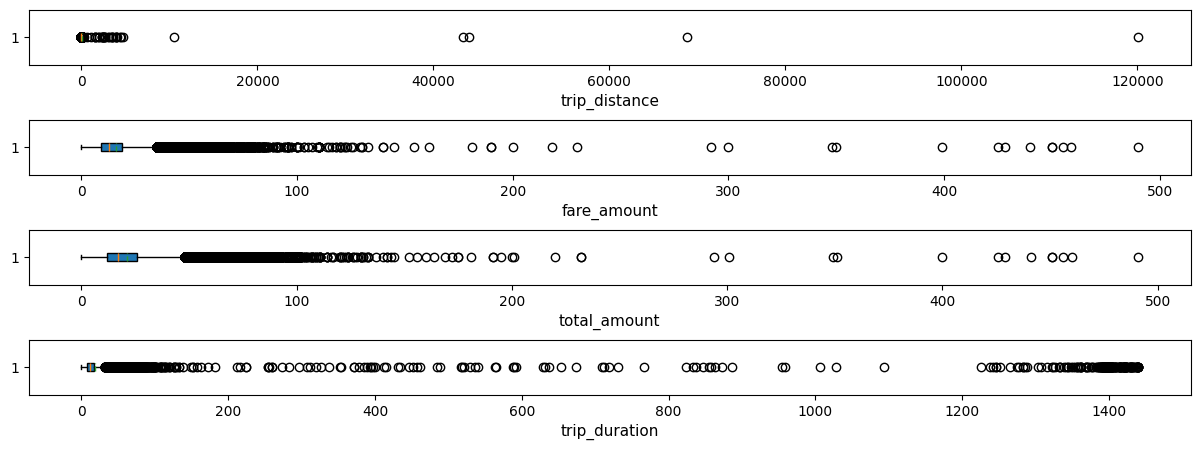

In [591]:
fig, axes = plt.subplots(4, figsize=(15, 5))

# Create box plots for each column
columns_to_check = ['trip_distance', 'fare_amount', 'total_amount','trip_duration']
for i, col in enumerate(columns_to_check):
    axes[i].boxplot(df[col], patch_artist=True, meanline=True, showmeans=True, vert=False)
    axes[i].set_xlabel(col, fontsize=11)

# Adjust subplot spacing
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=1)

# Show the plots
plt.show()

In [592]:
# dropping outlier in trip_distance
df[df['trip_distance'] > 100]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,total_amount,trip_type,PU_Borough,PU_Zone,DO_Borough,DO_Zone,trip_duration
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,N,5,82,236,1,1571.97,29,43,1,Queens,Elmhurst,Manhattan,Upper East Side North,24.116667
63995,2,2023-01-01 12:35:00,2023-01-01 12:58:00,U,5,181,137,1,579.63,28,37,0,Brooklyn,Park Slope,Manhattan,Kips Bay,23.000000
64446,2,2023-01-05 08:39:00,2023-01-05 08:58:00,U,5,193,140,1,2555.47,23,27,0,Queens,Queensbridge/Ravenswood,Manhattan,Lenox Hill East,19.000000
64558,2,2023-01-05 17:21:00,2023-01-05 17:26:00,U,1,49,65,1,3077.89,12,17,0,Brooklyn,Clinton Hill,Brooklyn,Downtown Brooklyn/MetroTech,5.000000
64572,2,2023-01-05 18:07:00,2023-01-05 18:13:00,U,1,193,193,1,2606.52,11,13,0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood,6.000000
64609,2,2023-01-06 07:27:00,2023-01-06 07:30:00,U,1,41,74,1,43392.12,12,15,0,Manhattan,Central Harlem,Manhattan,East Harlem North,3.000000
64695,2,2023-01-06 14:16:00,2023-01-06 14:59:00,U,1,82,130,1,137.95,44,49,0,Queens,Elmhurst,Queens,Jamaica,43.000000
64947,2,2023-01-08 23:47:00,2023-01-08 23:59:00,U,5,52,79,1,2446.53,23,31,0,Brooklyn,Cobble Hill,Manhattan,East Village,12.000000
64954,2,2023-01-09 04:28:00,2023-01-09 04:46:00,U,1,119,20,1,2027.31,20,22,0,Bronx,Highbridge,Bronx,Belmont,18.000000
65149,2,2023-01-10 15:40:00,2023-01-10 16:24:00,U,1,26,37,1,1082.45,49,51,0,Brooklyn,Borough Park,Brooklyn,Bushwick South,44.000000


In [593]:
df.drop(df[df['trip_distance'] > 100].index, inplace=True)

In [622]:
df[df['trip_distance'] == 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,trip_duration,fare_amount,total_amount,trip_type,PU_Borough,PU_Zone,DO_Borough,DO_Zone


- i dropping the trip distance that have 0 value because it can happend by many variable.

In [595]:
df.drop(df[df['trip_distance'] == 0].index, inplace=True)

In [596]:
# checking and dropping unusual data
df[(df['total_amount'] < df['fare_amount'])]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,total_amount,trip_type,PU_Borough,PU_Zone,DO_Borough,DO_Zone,trip_duration
64376,2,2023-01-04 15:11:00,2023-01-04 15:12:00,U,1,25,25,1,0.13,27,23,0,Brooklyn,Boerum Hill,Brooklyn,Boerum Hill,1.0
64487,2,2023-01-05 10:51:00,2023-01-05 11:20:00,U,1,116,151,1,2.22,43,41,0,Manhattan,Hamilton Heights,Manhattan,Manhattan Valley,29.0
65108,2,2023-01-10 10:00:00,2023-01-10 10:26:00,U,1,168,159,1,3.45,17,16,0,Bronx,Mott Haven/Port Morris,Bronx,Melrose South,26.0
66459,2,2023-01-19 17:48:00,2023-01-19 17:52:00,U,1,166,166,1,0.38,35,29,0,Manhattan,Morningside Heights,Manhattan,Morningside Heights,4.0
67461,2,2023-01-26 10:10:00,2023-01-26 10:20:00,U,1,248,126,1,1.51,15,14,0,Bronx,West Farms/Bronx River,Bronx,Hunts Point,10.0


In [597]:
df.drop(df[(df['total_amount'] < df['fare_amount'])].index, inplace=True)

In [598]:
#dropping outlier in total_amount
df[df['total_amount'] > 200]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,total_amount,trip_type,PU_Borough,PU_Zone,DO_Borough,DO_Zone,trip_duration
556,2,2023-01-01 13:07:46,2023-01-01 19:45:18,N,1,223,8,1,16.00,292,294,1,Queens,Steinway,Queens,Astoria Park,397.533333
2014,2,2023-01-02 15:36:45,2023-01-02 20:44:45,N,1,223,223,1,2.35,218,220,1,Queens,Steinway,Queens,Steinway,308.000000
7731,2,2023-01-05 12:12:49,2023-01-05 19:53:49,N,1,223,223,1,25.48,348,349,1,Queens,Steinway,Queens,Steinway,461.000000
12615,2,2023-01-07 15:55:53,2023-01-07 20:38:53,N,1,223,223,1,20.43,230,232,1,Queens,Steinway,Queens,Steinway,283.000000
18474,2,2023-01-10 15:58:15,2023-01-10 15:58:26,N,5,92,92,1,0.38,440,441,2,Queens,Flushing,Queens,Flushing,0.183333
50526,2,2023-01-25 17:14:16,2023-01-25 17:21:43,N,5,80,37,1,0.60,425,426,2,Brooklyn,East Williamsburg,Brooklyn,Bushwick South,7.450000
50588,2,2023-01-25 18:24:30,2023-01-25 18:28:48,N,1,223,223,1,0.76,6,232,1,Queens,Steinway,Queens,Steinway,4.300000
59442,2,2023-01-29 20:01:58,2023-01-29 20:05:25,N,5,92,92,1,0.07,455,456,2,Queens,Flushing,Queens,Flushing,3.450000
61656,2,2023-01-30 22:13:19,2023-01-30 22:13:32,N,5,82,82,1,0.02,399,400,2,Queens,Elmhurst,Queens,Elmhurst,0.216667


In [599]:
df.drop(df[df['total_amount'] > 200].index, inplace=True)

In [602]:
#checking data outside range
df[df['lpep_pickup_datetime'].dt.year != 2023]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,total_amount,trip_type,PU_Borough,PU_Zone,DO_Borough,DO_Zone,trip_duration
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,N,1,7,56,1,5.37,16,16,1,Queens,Astoria,Queens,Corona,11.616667
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,N,1,260,164,1,5.48,25,35,1,Queens,Woodside,Manhattan,Midtown South,37.400000
17874,2,2009-01-01 20:21:27,2009-01-02 11:07:31,N,1,65,178,1,7.72,34,43,1,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Ocean Parkway South,886.066667


In [603]:
# Drop rows where the year is not 2023
df.drop(df[df['lpep_pickup_datetime'].dt.year != 2023].index, inplace=True)

In [604]:
df[df['lpep_pickup_datetime'].dt.month != 1]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,total_amount,trip_type,PU_Borough,PU_Zone,DO_Borough,DO_Zone,trip_duration
25100,2,2023-02-01 03:10:05,2023-02-01 03:40:35,N,5,82,198,2,4.58,28,33,2,Queens,Elmhurst,Queens,Ridgewood,30.5


In [605]:
df.drop(df[df['lpep_pickup_datetime'].dt.month != 1].index, inplace=True)

In [606]:
# drop outlier in trip_duration
df[df['trip_duration'] > 200]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,total_amount,trip_type,PU_Borough,PU_Zone,DO_Borough,DO_Zone,trip_duration
49,2,2023-01-01 00:23:04,2023-01-01 23:18:32,N,1,255,48,1,8.55,47,58,1,Brooklyn,Williamsburg (North Side),Manhattan,Clinton East,1375.466667
108,2,2023-01-01 01:53:59,2023-01-02 00:00:00,N,1,260,223,1,2.64,14,17,1,Queens,Woodside,Queens,Steinway,1326.016667
118,2,2023-01-01 01:25:46,2023-01-02 00:29:15,N,1,129,37,1,6.53,31,33,1,Queens,Jackson Heights,Brooklyn,Bushwick South,1383.483333
207,2,2023-01-01 03:12:42,2023-01-02 02:03:43,N,5,129,129,1,0.72,20,26,2,Queens,Jackson Heights,Queens,Jackson Heights,1371.016667
262,2,2023-01-01 04:03:36,2023-01-02 03:31:50,N,1,65,37,5,3.61,20,23,1,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Bushwick South,1408.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62591,2,2023-01-31 13:58:22,2023-02-01 11:46:10,N,1,130,130,1,0.10,3,5,1,Queens,Jamaica,Queens,Jamaica,1307.800000
62653,2,2023-01-31 13:57:30,2023-02-01 10:49:04,N,1,244,43,3,5.74,31,34,1,Manhattan,Washington Heights South,Manhattan,Central Park,1251.566667
62762,2,2023-01-31 15:21:47,2023-02-01 00:00:00,N,1,92,64,2,9.15,39,44,1,Queens,Flushing,Queens,Douglaston,518.216667
63279,2,2023-01-31 18:22:24,2023-02-01 00:00:00,N,1,82,82,1,1.46,10,14,1,Queens,Elmhurst,Queens,Elmhurst,337.600000


In [607]:
df.drop(df[df['trip_duration'] > 200].index, inplace=True)

In [609]:
df['trip_duration'] = df['trip_duration'].astype('int64')

In [610]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60084 entries, 0 to 68210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               60084 non-null  int64         
 1   lpep_pickup_datetime   60084 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  60084 non-null  datetime64[ns]
 3   store_and_fwd_flag     60084 non-null  object        
 4   RatecodeID             60084 non-null  int64         
 5   PULocationID           60084 non-null  int64         
 6   DOLocationID           60084 non-null  int64         
 7   passenger_count        60084 non-null  int64         
 8   trip_distance          60084 non-null  float64       
 9   fare_amount            60084 non-null  int64         
 10  total_amount           60084 non-null  int64         
 11  trip_type              60084 non-null  int64         
 12  PU_Borough             60084 non-null  object        
 13  PU_Zon

In [611]:
df.shape

(60084, 17)

In [612]:
# setting column to proper order
df = df[['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime','store_and_fwd_flag','RatecodeID','PULocationID','DOLocationID','passenger_count','trip_distance','trip_duration','fare_amount','total_amount','trip_type','PU_Borough','PU_Zone','DO_Borough','DO_Zone']]

In [613]:
df.to_csv(r'D:\Purwadhika\Module 2\excersie dashboard\New York City Taxi and Limousine Trip Record\clean NYC TLC Trip Record.csv', index= False)

In [616]:
df.VendorID.isna().sum()

0

# ANALYSIS

## Competition from Ride-Sharing Services

Traditional taxi companies are struggling to compete with ride-sharing platforms like Uber and Lyft, which offer greater convenience, affordability, and reliability.

C:\Users\Asus\AppData\Local\Temp\ipykernel_34176\3039204420.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=daily_trip_count, x='lpep_pickup_datetime', y='trip_count', hue='VendorID', ci=None)


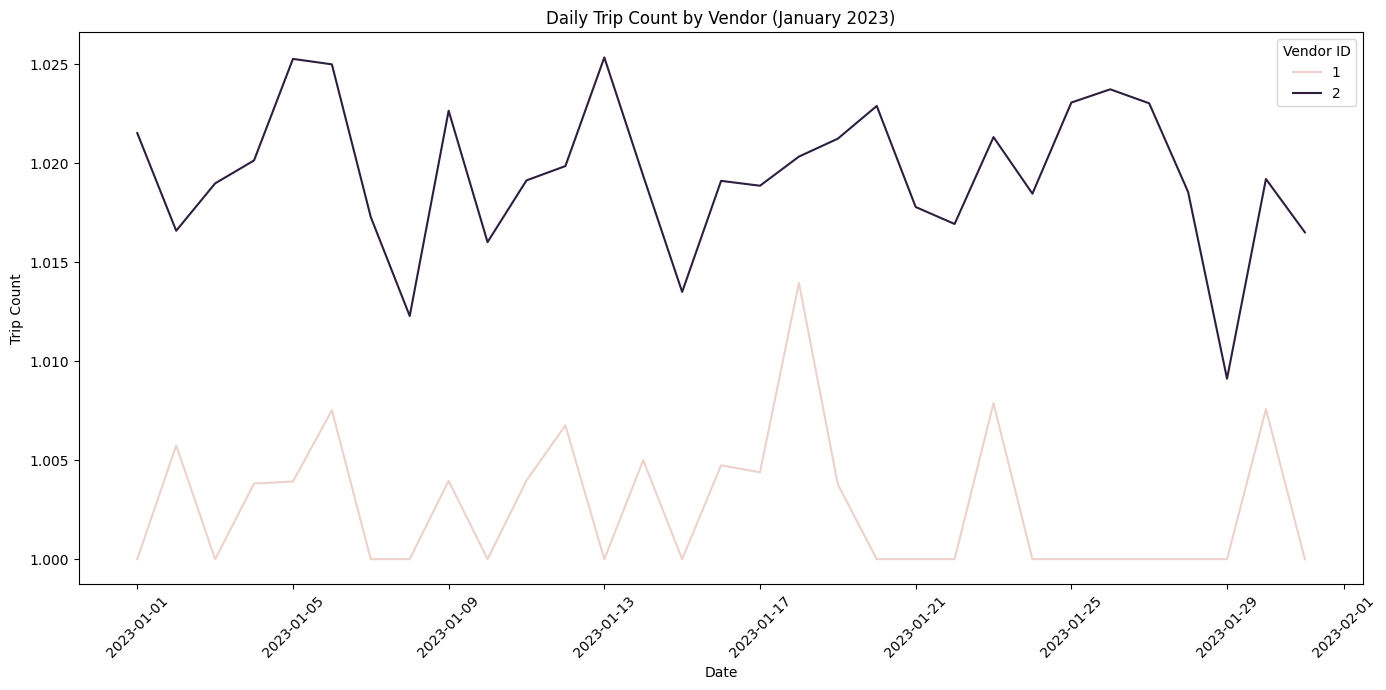

In [628]:
# Visualization 1: Line Graph - Daily Trip Count
daily_trip_count = df.groupby(['lpep_pickup_datetime', 'VendorID']).size().reset_index(name='trip_count')
daily_trip_count['lpep_pickup_datetime'] = daily_trip_count['lpep_pickup_datetime'].dt.date

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_trip_count, x='lpep_pickup_datetime', y='trip_count', hue='VendorID', ci=None)
plt.title('Daily Trip Count by Vendor (January 2023)')
plt.xlabel('Date')
plt.ylabel('Trip Count')
plt.legend(title='Vendor ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observations:

### Vendor Performance:
- Vendor ID 2 consistently has a higher trip count compared to Vendor ID 1 throughout January 2023.

### Fluctuations:
- Both vendors exhibit fluctuations in daily trip counts, indicating variability in daily demand.

### Low Trip Counts:
- Vendor ID 1 shows notably lower trip counts, suggesting either a smaller market share or operational inefficiencies.

## Insights:

### Competitive Disadvantage:
- The consistently lower trip counts for Vendor ID 1 indicate a significant competitive disadvantage against both Vendor ID 2 and likely ride-sharing services. This could be due to a variety of factors such as customer preference, pricing, or availability of services.

### Daily Demand Patterns:
- The fluctuations in daily trip counts suggest that both vendors experience variable demand. Identifying the factors contributing to these fluctuations (e.g., weather, events, or peak times) could help in optimizing operations and improving service availability.

### Operational Improvements:
- Vendor ID 1 should focus on understanding the reasons behind its lower trip counts. This could involve analyzing customer feedback, improving service quality, enhancing marketing efforts, and leveraging technology for better route optimization and booking systems.


Rising fuel costs significantly impact profit margins, requiring efficient fleet management to mitigate the financial strain.

## Customer Service Issues

Providing excellent customer service is essential for retaining and attracting customers. This includes reliable rides, clean vehicles, and courteous drivers.

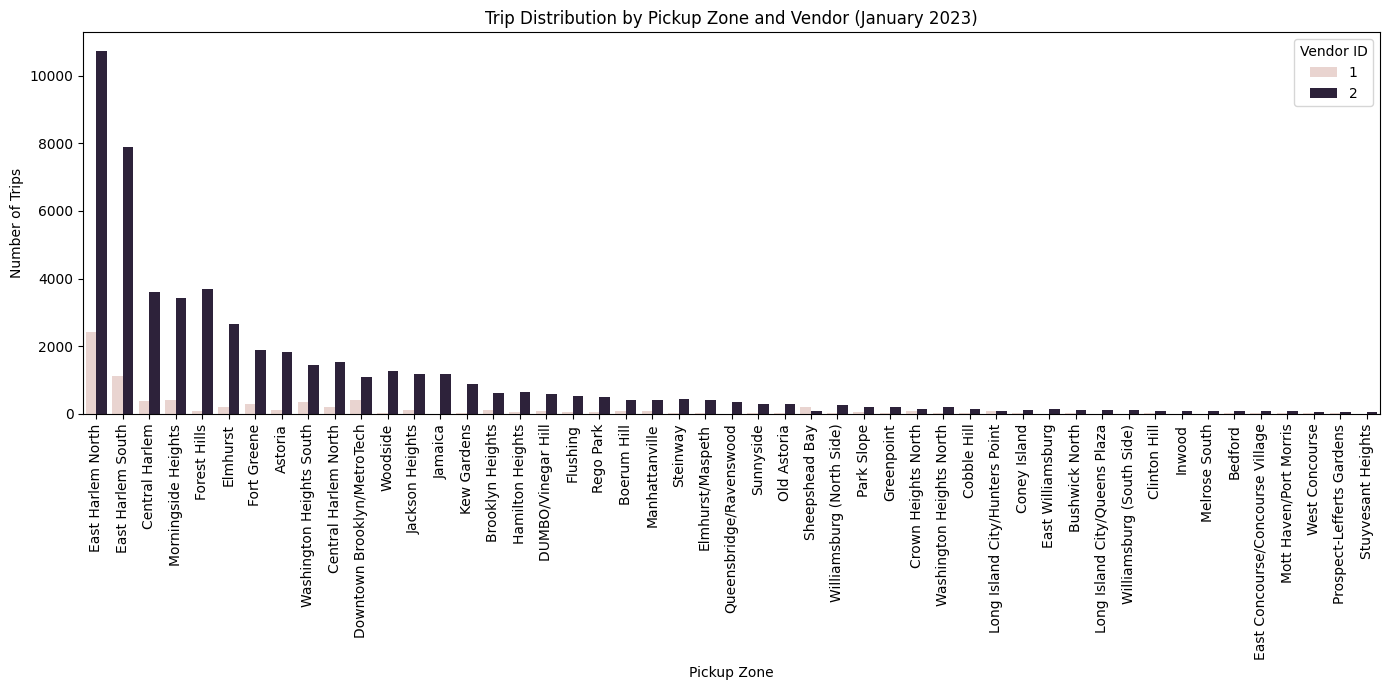

In [276]:
# Step 1: Count the occurrences of each pickup zone
zone_counts = df['PU_Zone'].value_counts()

# Step 2: Identify the most frequent zones (you can adjust the threshold as needed)
top_zones = zone_counts[zone_counts > 75].index  # Example: zones with more than 100 trips

# Step 3: Filter the DataFrame to include only these zones
filtered_df = df[df['PU_Zone'].isin(top_zones)]

# Step 4: Create a bar plot to show the distribution of trips for the two vendors
# We need to order the categories by the number of trips
order = zone_counts.loc[top_zones].index

plt.figure(figsize=(14, 7))
sns.countplot(data=filtered_df, x='PU_Zone', hue='VendorID', order=order)
plt.title('Trip Distribution by Pickup Zone and Vendor (January 2023)')
plt.xlabel('Pickup Zone')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.legend(title='Vendor ID')
plt.tight_layout()
plt.show()

## Observations:

- East Harlem North, East Harlem South, and Central Harlem North have the highest number of trips for both vendors. This indicates a high demand in these zones.

- Both vendors show similar patterns in trip distribution across zones, suggesting they operate in the same geographic areas.

- Zones like Park Slope, Crown Heights North, and Bedford are at the lower end of the spectrum, indicating less demand or possible service issues in these areas.

## Insights:

- The high concentration of trips in specific zones highlights areas with strong demand. Vendors can focus on maintaining high service quality in these areas to retain and attract more customers.

- Lower trip counts in certain zones might indicate service gaps or lower customer satisfaction. Investigating the reasons behind this can help vendors improve service quality and coverage.

- Vendors should prioritize operational resources and marketing efforts in high-demand zones while identifying strategies to improve performance in lower-demand areas.


## Regulatory Challenges

Taxi companies face numerous regulatory challenges, including licensing requirements, minimum fare rates, and vehicle safety standards, which can limit their ability to operate efficiently.

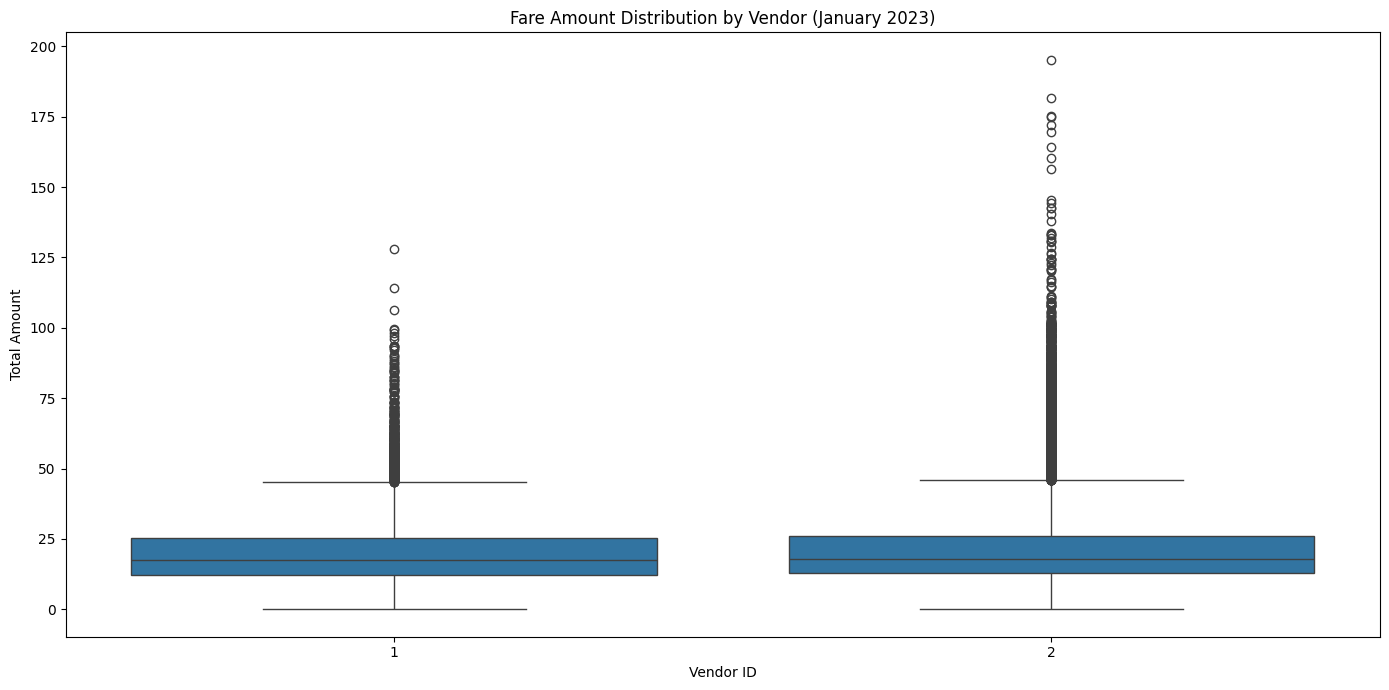

In [280]:
# Visualization 4: Box Plot - Fare Amount Distribution by Vendor
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='VendorID', y='total_amount')
plt.title('Fare Amount Distribution by Vendor (January 2023)')
plt.xlabel('Vendor ID')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()

## Observations:

- Both vendors show a similar distribution pattern for fare amounts, with median values and interquartile ranges (IQR) that are quite close.

- Both vendors have a significant number of outliers, particularly for higher fare amounts. Vendor ID 2 has slightly more extreme outliers compared to Vendor ID 1.

## Insights:

- The similarity in fare distributions suggests that both vendors are adhering to fare regulations consistently. This is important for maintaining compliance with NYC Taxi and Limousine Commission (TLC) rules.

- The presence of many high fare outliers indicates occasional long-distance or premium trips. However, too many high fare outliers might also suggest potential fare inflation or inconsistencies in fare calculation.

- Despite the regulatory framework, slight differences in the handling of fare structures could be seen in the number of extreme outliers, pointing towards different fare strategies or customer bases.


## Rising Fuel Costs

Rising fuel costs significantly impact profit margins, requiring efficient fleet management to mitigate the financial strain.

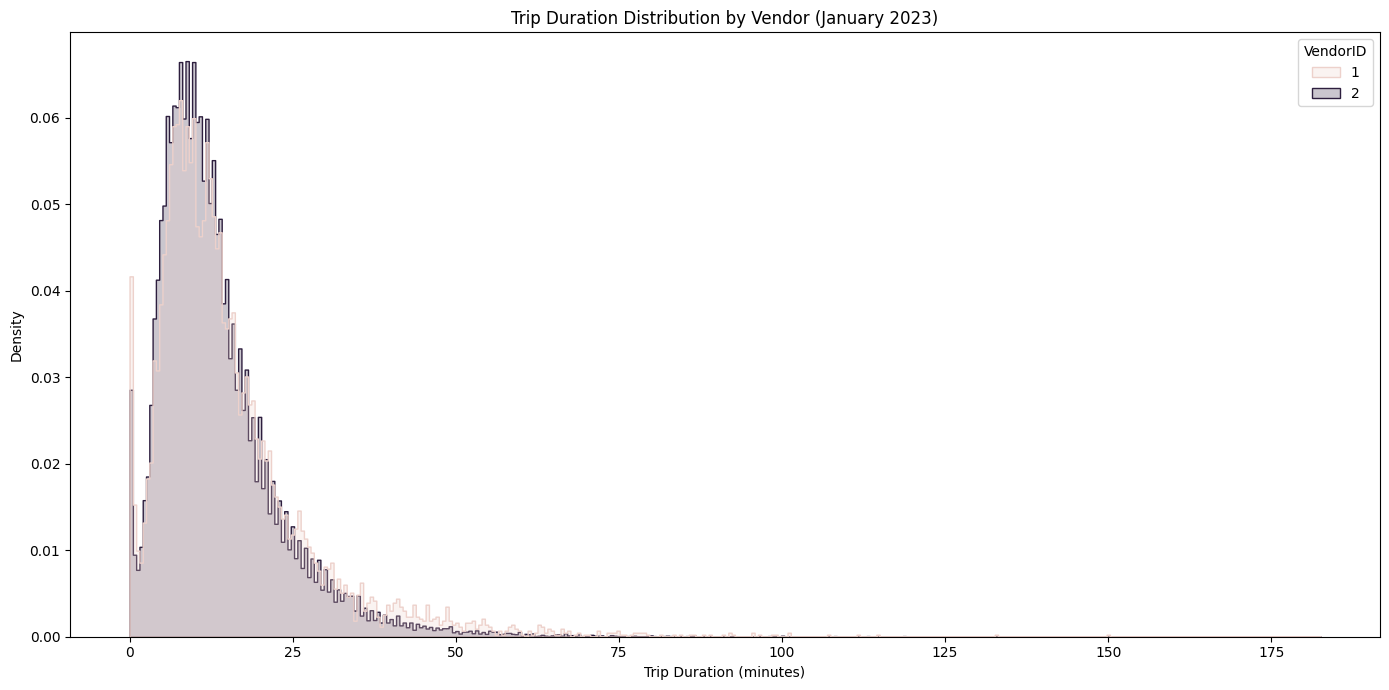

In [265]:
# Histogram - Trip Duration Distribution
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='trip_duration', hue='VendorID', element='step', stat='density', common_norm=False)
plt.title('Trip Duration Distribution by Vendor (January 2023)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

## Trip Duration Distribution by Vendor
### Observation:
- The histogram shows that most trips for both vendors are concentrated between 0 to 25 minutes.
- There are very few long-duration trips.

### Insight:
- The similar distribution patterns suggest that both vendors operate in similar geographic areas and have comparable trip lengths.
- Efficiently managing these shorter trips is crucial for mitigating fuel costs.

C:\Users\Asus\AppData\Local\Temp\ipykernel_34176\1725625560.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=daily_avg_fare, x='lpep_pickup_datetime', y='total_amount', hue='VendorID', ci=None)


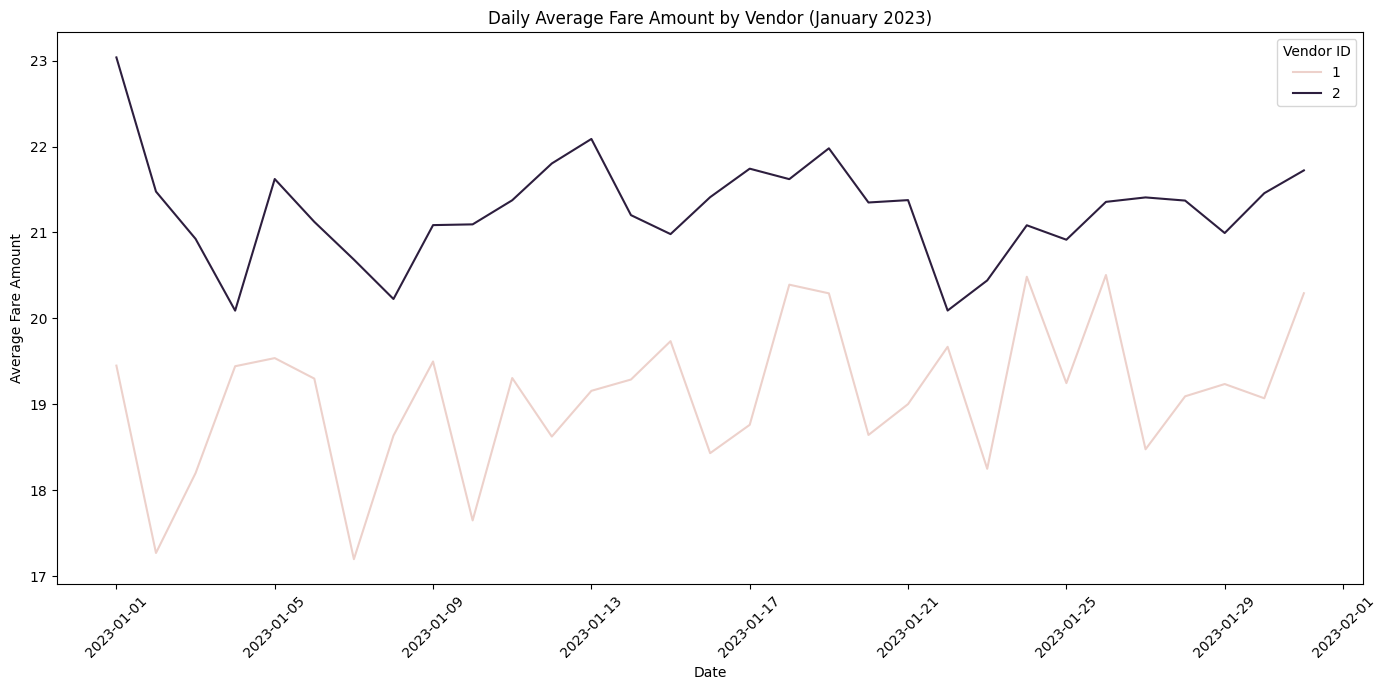

In [629]:
# Line Graph - Daily Average Fare Amount
daily_avg_fare = df.groupby(['lpep_pickup_datetime', 'VendorID'])['total_amount'].mean().reset_index()
daily_avg_fare['lpep_pickup_datetime'] = daily_avg_fare['lpep_pickup_datetime'].dt.date

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_avg_fare, x='lpep_pickup_datetime', y='total_amount', hue='VendorID', ci=None)
plt.title('Daily Average Fare Amount by Vendor (January 2023)')
plt.xlabel('Date')
plt.ylabel('Average Fare Amount')
plt.legend(title='Vendor ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Daily Average Fare Amount by Vendor

### Observation:
- Vendor ID 2 generally has a slightly higher average fare amount compared to Vendor ID 1, with some daily fluctuations.

### Insight:
- The higher average fares for Vendor ID 2 might indicate a different pricing strategy or a focus on longer or premium trips.
- Understanding these patterns can help both vendors optimize their revenue and manage fuel costs.

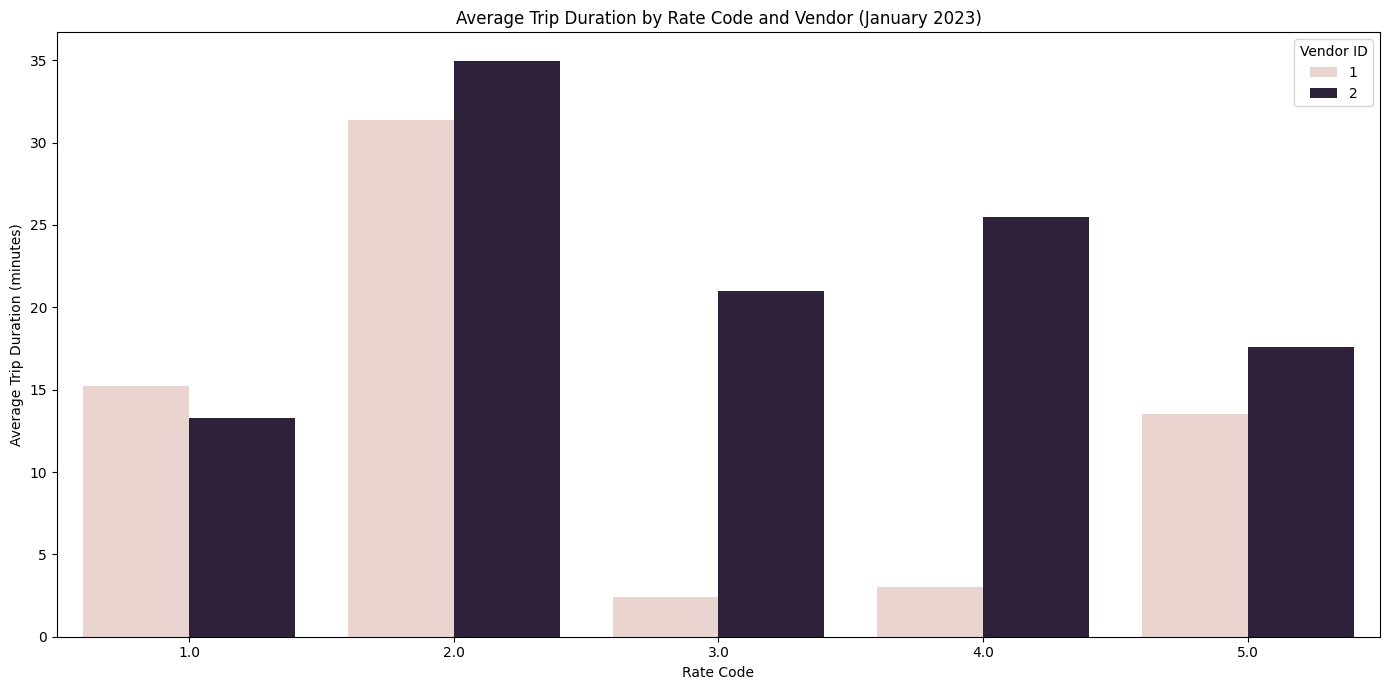

In [262]:
# Bar Plot - Average Trip Duration by Rate Code
avg_duration_by_rate = df.groupby(['RatecodeID', 'VendorID'])['trip_duration'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=avg_duration_by_rate, x='RatecodeID', y='trip_duration', hue='VendorID')
plt.title('Average Trip Duration by Rate Code and Vendor (January 2023)')
plt.xlabel('Rate Code')
plt.ylabel('Average Trip Duration (minutes)')
plt.legend(title='Vendor ID')
plt.tight_layout()
plt.show()

## Average Trip Duration by Rate Code and Vendor

### Observation:
- The bar plot shows that average trip durations vary significantly across different rate codes for both vendors.
- For example, Rate Code 2 has the highest average trip duration for both vendors.

### Insight:
- Differences in trip durations across rate codes suggest that certain fare structures are associated with longer trips.
- Optimizing the use of different rate codes could help in managing trip durations and fuel consumption.


## Technological Advancements

Staying competitive in the taxi industry requires continuous investment in technology, such as booking apps, GPS tracking, and EVs.

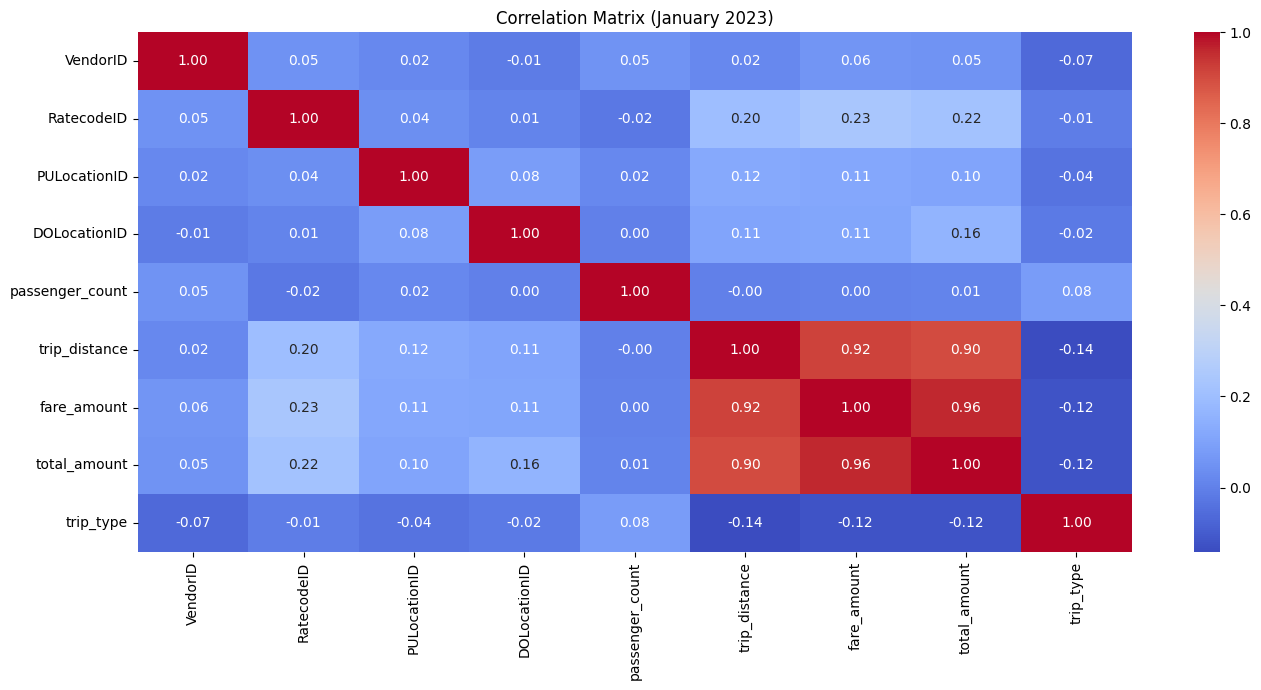

In [631]:
# Selecting the relevant columns for the correlation matrix
columns_of_interest = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'total_amount', 'trip_type']
corr_matrix = df[columns_of_interest].corr()

# Plotting the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (January 2023)')
plt.tight_layout()
plt.show()

## Correlation Matrix

- Trip Distance and Fare Amount: A strong positive correlation (0.85) between trip distance and fare amount suggests that longer trips result in higher fares, which is expected.
- Trip Distance and Total Amount: Similarly, the strong positive correlation (0.85) indicates that total fare increases with trip distance.
- Fare Amount and Total Amount: An almost perfect correlation (0.96) shows that fare amount is the primary component of the total amount, which likely includes additional charges like tips and surcharges.
- Passenger Count: The passenger count has weak correlations with other features, indicating that the number of passengers does not significantly impact fare amount, trip distance, or total amount.
- RatecodeID and Fare Amount: A moderate correlation (0.20) suggests that different rate codes influence the fare amount to some extent.

## Detailed Analysis:

### Technological Advancements and Operational Efficiency

#### 1. Route Optimization and GPS Integration:
- Insight: The strong correlations between trip distance, fare amount, and total amount highlight the importance of efficient route planning. By implementing advanced GPS and route optimization technologies, green cabs can ensure that trips are conducted via the most efficient routes, reducing travel time and fuel consumption.
- Recommendation: Invest in state-of-the-art GPS systems and route optimization software to minimize trip durations and distances, thereby enhancing operational efficiency.

#### 2. Real-Time Monitoring and Fleet Management:
- Insight: Real-time data monitoring can help manage fleet operations more effectively. The weak correlation between passenger count and other features suggests that optimizing fleet deployment based on demand patterns rather than passenger numbers could be more effective.
- Recommendation: Implement real-time monitoring systems to track vehicle locations, trip progress, and demand hotspots. This can help in dynamically adjusting fleet deployment to areas with higher demand, improving service availability and efficiency.

#### 3. Dynamic Pricing and Fare Management:
- Insight: The moderate correlation between RatecodeID and fare amount indicates that different fare structures have a tangible impact on revenue. Leveraging this, dynamic pricing models can be employed to maximize revenue during peak times and offer discounts during off-peak times to attract more customers.
- Recommendation: Develop and implement dynamic pricing algorithms that adjust fares based on real-time demand, trip distance, and duration. This can help optimize revenue while maintaining competitive pricing.



## Conclusion

In conclusion, the analysis of green cab operations in New York City reveals several areas for improvement and strategic enhancement. By focusing on customer service, leveraging advanced technology, optimizing fare strategies, improving operational efficiency, and balancing trip types, green cab vendors can significantly enhance their competitive edge in a challenging market. 

- Customer Service: Prioritizing service quality in high-demand zones and addressing issues in lower-performing areas can attract and retain more customers.
- Technology Integration: Investing in GPS and real-time monitoring systems can optimize route planning and fleet management, reducing trip durations and fuel consumption.
- Fare Optimization: Regular fare audits and dynamic pricing models can ensure regulatory compliance, enhance transparency, and optimize revenue.
- Operational Efficiency: Efficient management of short trips and transitioning to hybrid or electric vehicles can reduce operational costs and environmental impact.
- Trip Type Balance: Optimizing the mix of street-hail and dispatch trips based on demand patterns can improve service effectiveness and coverage.

By implementing these recommendations, CMT and VeriFone can address current challenges and improve their operational performance, ensuring a sustainable and competitive future in New York City's taxi industry.